In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
coauthorship_file = 'co_authorship.csv'
affiliation_file = 'affiliation.csv'
print("Academic Collaboration Network Analysis")
print("Importing Datasets and Transforming Matrices\n")

Academic Collaboration Network Analysis
Importing Datasets and Transforming Matrices



In [ ]:
# One-Mode Dataset (Academic Co-authorship Network)
G_coauthorship = None
try:
    df_coauthors = pd.read_csv(coauthorship_file, header=None, names=['Author1', 'Author2'])
    
    # Create an undirected graph from the edge list
    G_coauthorship = nx.from_pandas_edgelist(df_coauthors, source='Author1', target='Author2', create_using=nx.Graph())
    
    print(f"One-Mode (Co-authorship) Network loaded successfully from '{coauthorship_file}'.")
    print("Edges (Co-authorships):\n", df_coauthors)
    print(f"\nNodes in Co-authorship Network: {G_coauthorship.nodes()}")
    print(f"Edges in Co-authorship Network: {G_coauthorship.edges()}")
    print("\n" + "="*50 + "\n")
except FileNotFoundError:
    print(f"Error: The file '{coauthorship_file}' was not found.")
    print("Exiting analysis System Failure Detected")
    exit()

One-Mode (Co-authorship) Network loaded successfully from 'co_authorship.csv'.
Edges (Co-authorships):
      Author1     Author2
0   Dr. Anil    Dr. Binu
1   Dr. Anil   Dr. Carol
2   Dr. Binu   Dr. David
3  Dr. Carol     Dr. Eve
4  Dr. David   Dr. Frank
5    Dr. Eve  Dr. George
6   Dr. Anil   Dr. Frank
7   Dr. Binu   Dr. Carol

Nodes in Co-authorship Network: ['Dr. Anil', 'Dr. Binu', 'Dr. Carol', 'Dr. David', 'Dr. Eve', 'Dr. Frank', 'Dr. George']
Edges in Co-authorship Network: [('Dr. Anil', 'Dr. Binu'), ('Dr. Anil', 'Dr. Carol'), ('Dr. Anil', 'Dr. Frank'), ('Dr. Binu', 'Dr. David'), ('Dr. Binu', 'Dr. Carol'), ('Dr. Carol', 'Dr. Eve'), ('Dr. David', 'Dr. Frank'), ('Dr. Eve', 'Dr. George')]




In [4]:
# --- B. Two-Mode Dataset (University-Affiliation Network) ---
G_affiliation = None
try:
    df_affiliation = pd.read_csv(affiliation_file, header=None, names=['Person', 'Institution'])
    # Create an undirected graph from the edge list
    G_affiliation = nx.Graph()
    G_affiliation.add_edges_from(df_affiliation.values.tolist())

    # To treat it as a bipartite graph in NetworkX, we assign a 'bipartite' attribute to nodes.
    persons = df_affiliation['Person'].unique()
    institutions = df_affiliation['Institution'].unique()
    
    # Assign the 'bipartite' attribute 
    for node in G_affiliation.nodes():
        if node in persons:
            G_affiliation.nodes[node]['bipartite'] = 0 # Type 0: Person node
        elif node in institutions:
            G_affiliation.nodes[node]['bipartite'] = 1 # Type 1: Institution node

    print(f"Two-Mode (University-Affiliation) Network loaded successfully from '{affiliation_file}'.")
    print("Edges (Affiliations):\n", df_affiliation)
    print(f"\nNodes in Affiliation Network: {G_affiliation.nodes()}")
    print(f"Edges in Affiliation Network: {G_affiliation.edges()}")
    print("\n" + "="*50 + "\n")
except FileNotFoundError:
    print(f"Error: The file '{affiliation_file}' was not found.")
    print("Exiting analysis for this topic as essential data is missing.")
    exit()

Two-Mode (University-Affiliation) Network loaded successfully from 'affiliation.csv'.
Edges (Affiliations):
        Person   Institution
0    Dr. Anil  University X
1    Dr. Binu  University Y
2   Dr. Carol  University X
3   Dr. David  University Z
4     Dr. Eve  University Y
5   Dr. Frank  University Z
6  Dr. George  University X
7    Dr. Anil  University Y

Nodes in Affiliation Network: ['Dr. Anil', 'University X', 'Dr. Binu', 'University Y', 'Dr. Carol', 'Dr. David', 'University Z', 'Dr. Eve', 'Dr. Frank', 'Dr. George']
Edges in Affiliation Network: [('Dr. Anil', 'University X'), ('Dr. Anil', 'University Y'), ('University X', 'Dr. Carol'), ('University X', 'Dr. George'), ('Dr. Binu', 'University Y'), ('University Y', 'Dr. Eve'), ('Dr. David', 'University Z'), ('University Z', 'Dr. Frank')]




In [5]:
# 1. Adjacency Matrix for One-Mode (Co-authorship) Network
print("\n--- 1. One-Mode (Co-authorship) Adjacency Matrix ---")
adj_matrix_coauthors = nx.to_numpy_array(G_coauthorship)
nodes_coauthors = list(G_coauthorship.nodes())

header = "  " + " ".join([f"{node:<10}" for node in nodes_coauthors])
print(header)
# Print the matrix rows with node names
for i, row in enumerate(adj_matrix_coauthors):
    print(f"{nodes_coauthors[i]:<10}" + " ".join([f"{int(val):<10}" for val in row]))
print("\n" + "="*50 + "\n")


--- 1. One-Mode (Co-authorship) Adjacency Matrix ---
  Dr. Anil   Dr. Binu   Dr. Carol  Dr. David  Dr. Eve    Dr. Frank  Dr. George
Dr. Anil  0          1          1          0          0          1          0         
Dr. Binu  1          0          1          1          0          0          0         
Dr. Carol 1          1          0          0          1          0          0         
Dr. David 0          1          0          0          0          1          0         
Dr. Eve   0          0          1          0          0          0          1         
Dr. Frank 1          0          0          1          0          0          0         
Dr. George0          0          0          0          1          0          0         




In [7]:
# 2. Adjacency Matrix for Two-Mode (University-Affiliation) Network (Incidence Matrix)
print("\n--- 2. Two-Mode (University-Affiliation) Incidence Matrix ---")

# Separate the nodes into their respective sets based on the 'bipartite' attribute
persons_set = {n for n, d in G_affiliation.nodes(data=True) if d['bipartite'] == 0}
institutions_set = {n for n, d in G_affiliation.nodes(data=True) if d['bipartite'] == 1}

# Create a zero-initialized matrix with dimensions (number of persons x number of institutions)
incidence_matrix = np.zeros((len(persons_set), len(institutions_set)), dtype=int)

# Create mappings from node names to matrix indices for easier population
person_to_idx = {person: i for i, person in enumerate(sorted(list(persons_set)))}
institution_to_idx = {inst: i for i, inst in enumerate(sorted(list(institutions_set)))}

# Populate the incidence matrix
for u, v in G_affiliation.edges():
    if G_affiliation.nodes[u]['bipartite'] == 0: # u is a person, v is an institution
        p_node = u
        i_node = v
    else: # v is a person, u is an institution
        p_node = v
        i_node = u
    incidence_matrix[person_to_idx[p_node], institution_to_idx[i_node]] = 1

# Print formatted header for the incidence matrix
header = "    " + " ".join([f"{inst:<12}" for inst in sorted(list(institutions_set))])
print(header)
# Print the matrix rows with person names
for i, row in enumerate(incidence_matrix):
    print(f"{sorted(list(persons_set))[i]:<12}" + " ".join([f"{val:<12}" for val in row]))
print("\n" + "="*50 + "\n")


--- 2. Two-Mode (University-Affiliation) Incidence Matrix ---
    University X University Y University Z
Dr. Anil    1            1            0           
Dr. Binu    0            1            0           
Dr. Carol   1            0            0           
Dr. David   0            0            1           
Dr. Eve     0            1            0           
Dr. Frank   0            0            1           
Dr. George  1            0            0           




In [8]:
# 3. Projection 1: One-mode network of Researchers (Researchers are linked if they share an institution)
print("\n--- 3. Projection: One-Mode Network of Researchers (Shared Institution) ---")
G_researchers_proj = nx.bipartite.projected_graph(G_affiliation, persons_set)

# Get and print the adjacency matrix of this projected graph
adj_matrix_researchers_proj = nx.to_numpy_array(G_researchers_proj)
nodes_researchers_proj = list(G_researchers_proj.nodes())
header = "  " + " ".join([f"{node:<10}" for node in nodes_researchers_proj])
print(header)
for i, row in enumerate(adj_matrix_researchers_proj):
    print(f"{nodes_researchers_proj[i]:<10}" + " ".join([f"{int(val):<10}" for val in row]))

print("\nEdges in Researchers Projection (meaning: shared institution):")
print(G_researchers_proj.edges())
print("\n" + "="*50 + "\n")


--- 3. Projection: One-Mode Network of Researchers (Shared Institution) ---
  Dr. Carol  Dr. Eve    Dr. Frank  Dr. Binu   Dr. George Dr. Anil   Dr. David 
Dr. Carol 0          0          0          0          1          1          0         
Dr. Eve   0          0          0          1          0          1          0         
Dr. Frank 0          0          0          0          0          0          1         
Dr. Binu  0          1          0          0          0          1          0         
Dr. George1          0          0          0          0          1          0         
Dr. Anil  1          1          0          1          1          0          0         
Dr. David 0          0          1          0          0          0          0         

Edges in Researchers Projection (meaning: shared institution):
[('Dr. Carol', 'Dr. George'), ('Dr. Carol', 'Dr. Anil'), ('Dr. Eve', 'Dr. Binu'), ('Dr. Eve', 'Dr. Anil'), ('Dr. Frank', 'Dr. David'), ('Dr. Binu', 'Dr. Anil'), ('Dr. Geor

In [10]:
# 4. Projection 2: One-mode network of Institutions (Institutions are linked if they share a researcher)
print("\n--- 4. Projection: One-Mode Network of Institutions (Shared Researcher) ---")
G_institutions_proj = nx.bipartite.projected_graph(G_affiliation, institutions_set)

# Get and print the adjacency matrix of this projected graph
adj_matrix_institutions_proj = nx.to_numpy_array(G_institutions_proj)
nodes_institutions_proj = list(G_institutions_proj.nodes())
header = "  " + " ".join([f"{node:<12}" for node in nodes_institutions_proj])
print(header)
for i, row in enumerate(adj_matrix_institutions_proj):
    print(f"{nodes_institutions_proj[i]:<12}" + " ".join([f"{int(val):<12}" for val in row]))

print("\nEdges in Institutions Projection (meaning: shared researcher):")
print(G_institutions_proj.edges())
print("\n" + "="*50 + "\n")



--- 4. Projection: One-Mode Network of Institutions (Shared Researcher) ---
  University Z University X University Y
University Z0            0            0           
University X0            0            1           
University Y0            1            0           

Edges in Institutions Projection (meaning: shared researcher):
[('University X', 'University Y')]




Generating network visualizations (may open multiple plot windows)...


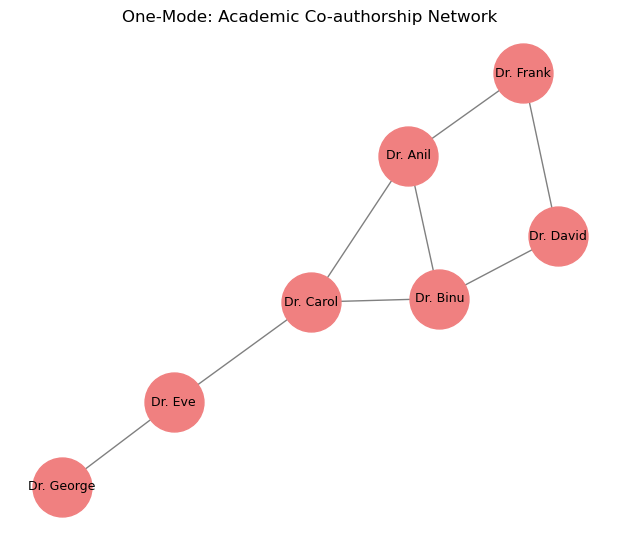

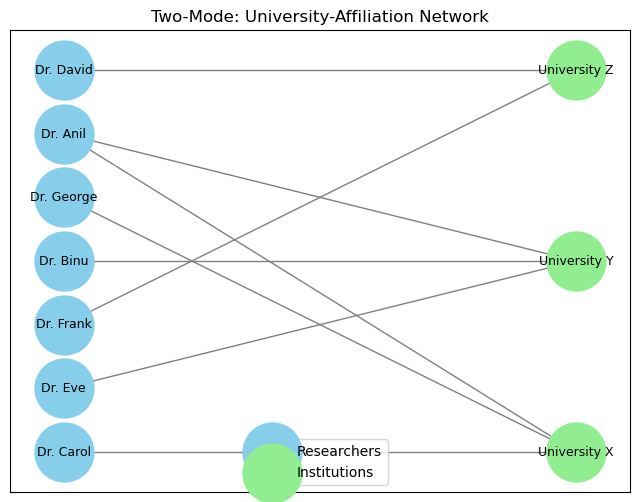

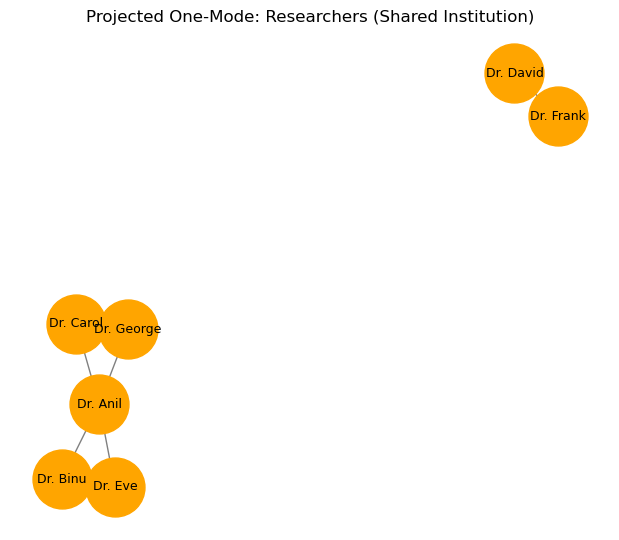

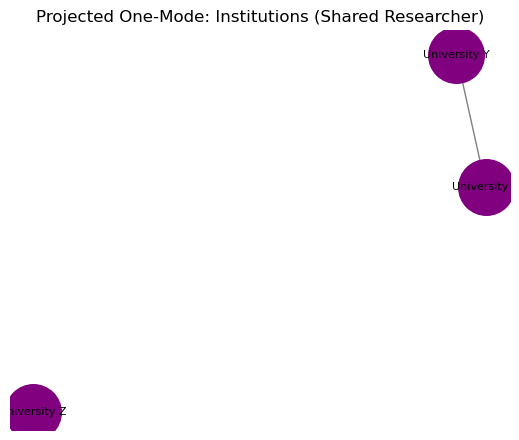

Network visualizations displayed.

--- Analysis Complete ---


In [15]:
# --- Optional: Visualize the Networks ---
print("Generating network visualizations (may open multiple plot windows)...")

# Visualize One-Mode (Co-authorship) Network
plt.figure(figsize=(6, 5))
pos_coauthors = nx.spring_layout(G_coauthorship) # Layout for visualization
nx.draw(G_coauthorship, pos_coauthors, with_labels=True, node_color='lightcoral', node_size=1800, edge_color='gray', linewidths=1, font_size=9)
plt.title("One-Mode: Academic Co-authorship Network")
plt.show()

# Visualize Two-Mode (University-Affiliation) Network (Bipartite Layout)
plt.figure(figsize=(8, 6))
# Use bipartite_layout to clearly separate the two types of nodes
pos_bipartite = nx.bipartite_layout(G_affiliation, persons_set) 
nx.draw_networkx_nodes(G_affiliation, pos_bipartite, nodelist=persons_set, node_color='skyblue', node_size=1800, label="Researchers")
nx.draw_networkx_nodes(G_affiliation, pos_bipartite, nodelist=institutions_set, node_color='lightgreen', node_size=1800, label="Institutions")
nx.draw_networkx_edges(G_affiliation, pos_bipartite, edge_color='gray')
nx.draw_networkx_labels(G_affiliation, pos_bipartite, font_size=9)
plt.title("Two-Mode: University-Affiliation Network")
plt.legend(scatterpoints=1) # Display legend for node types
plt.show()

# Visualize Projection of Researchers Network
plt.figure(figsize=(6, 5))
pos_proj_researchers = nx.spring_layout(G_researchers_proj)
nx.draw(G_researchers_proj, pos_proj_researchers, with_labels=True, node_color='orange', node_size=1800, edge_color='gray', linewidths=1, font_size=9)
plt.title("Projected One-Mode: Researchers (Shared Institution)")
plt.show()

# Visualize Projection of Institutions Network
plt.figure(figsize=(5, 4))
pos_proj_institutions = nx.spring_layout(G_institutions_proj)
nx.draw(G_institutions_proj, pos_proj_institutions, with_labels=True, node_color='purple', node_size=1600, edge_color='gray', linewidths=1, font_size=8)
plt.title("Projected One-Mode: Institutions (Shared Researcher)")
plt.show()
print("Network visualizations displayed.")

print("\n--- Analysis Complete ---")